# IRIS 데이터를 이용한 품종 분류 머신 러닝

## 01. load data & EDA

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
print('iris의 키 : {}'.format(iris.keys()))

iris의 키 : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print(iris['DESCR'][:193]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [0]:
print('타깃의 이름: {}'.format(iris['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [0]:
print('특성의 이름: {}'.format(iris_dataset['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
print('data의 타입: {}'.format(type(iris['data'])))

data의 타입: <class 'numpy.ndarray'>


In [0]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
print('data의 크기: {}'.format(iris['data'].shape))

data의 크기: (150, 4)


In [0]:
print('data의 처음 다섯 행:\n{}'.format(iris['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
print('target의 타입: {}'.format(type(iris['target'])))

target의 타입: <class 'numpy.ndarray'>


In [0]:
print('target의 크기: {}'.format(iris['target'].shape))

target의 크기: (150,)


In [0]:
print('target:\n{}'.format(iris['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 02. 훈련/테스트 데이터 나누기

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

In [0]:
print('X_train의 크기: {}'.format(X_train.shape))
print('y_train의 크기: {}'.format(y_train.shape))

X_train의 크기: (112, 4)
y_train의 크기: (112,)


In [0]:
print('X_test 크기: {}'.format(X_test.shape))
print('y_test 크기: {}'.format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


## 03. 데이터 살펴보기

In [0]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff11f7a71d0>,
      dtype=object)

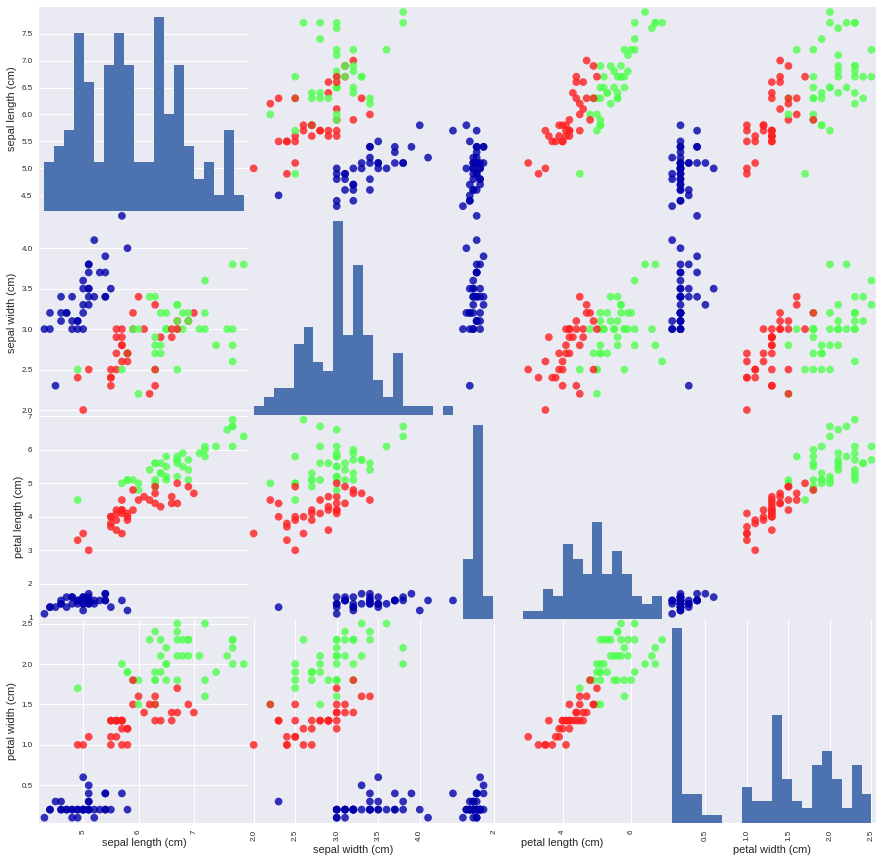

In [0]:
# X_train 데이터를 사용해서 데이터 프레임 만들기
# 열의 이름은 iris의 feature_names를 사용
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
# 데이터프레임을 사용해서 산점도 행렬을 만들되, 색구분은 y_train의 4가지 색상으로 합니다.
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [0]:
# 머신러닝 모델 만들기 : K-NN 분류 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## 예측하기

In [0]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [0]:
prediction = knn.predict(X_new)
print('예측: {}'.format(prediction))
print('예측한 타깃의 이름: {}'.format(
    iris['target_names'][prediction]
))

예측: [0]
예측한 타깃의 이름: ['setosa']


## 모델 평가하기

In [0]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n {}'.format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [0]:
print('테스트 세트의 정확도: {:.3f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.974


In [0]:
# knn 라이브러리 내 score함수 함수로 정확도 찍어보기
print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 요약하기

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


## 지도학습

In [0]:
print('X_train.shape: {}'.format(X_train.shape))

X_train.shape: (112, 4)


## k-NN classification

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


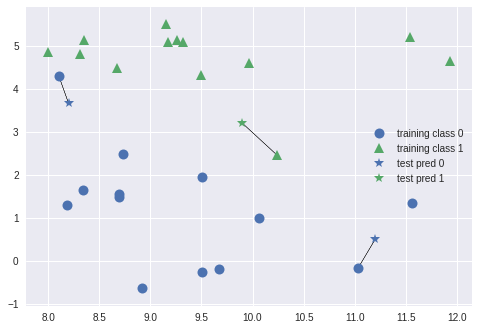

In [0]:
# k=1 일때 
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


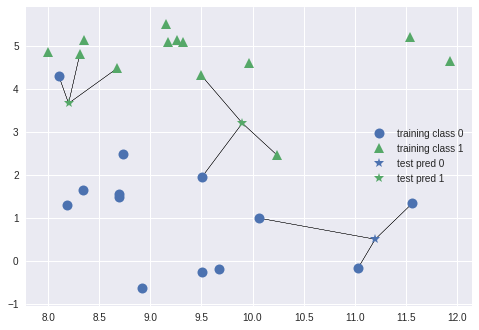

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
from sklearn.model_selection import train_test_split
X, y = iris['data'], iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [0]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [58]:
print('테스트 세트 예측:{}'.format(clf.predict(X_test)))

테스트 세트 예측:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [59]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.97
